### **Industrial Challenge - EDF - Group 2**
by Bruna RIBEIRO, Geraldo MARQUES and Yuichi TOKUMOTO


## Installing libraries

In [1]:
!pip3 install openturns
!pip3 install sklearn


## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import sklearn
from google.colab import files
import openturns as ot
import pylab as pl
from __future__ import print_function
from openturns.viewer import View 
from math import sqrt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit


## **1) First Approach: Historical data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
hd = pd.read_excel('/content/drive/MyDrive/ST4/data.xls')

In [5]:
hd.describe()

,Année,Débit mesuré maximal annuel (en m3/s),Hauteur associée mesurée (en m)
count,149.000000,149.000000,123.000000
mean,1923.000000,1335.419913,3.896748
std,43.156691,713.926746,1.272337
min,1849.000000,122.435600,1.000000
25%,1886.000000,799.918835,3.100000
50%,1923.000000,1256.402143,3.900000
75%,1960.000000,1694.929723,4.750000
max,1997.000000,3853.892756,7.200000


In [6]:
hd.columns = ['year', 'flow_Q', 'height_H']
hd = hd.dropna()
hd['year'] = hd['year'] - hd['year'].min()

In [7]:
X = hd.iloc[:, hd.columns != 'height_H']
Y = hd.iloc[:, 2] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
hd.head()

,year,flow_Q,height_H
1,0,1256.402143,4.0
2,1,1648.542191,4.5
3,2,1604.857094,4.3
4,3,341.157419,1.7
5,4,1148.712945,3.4


In [10]:

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
type(coeff_df['Coefficient'].year)

        Coefficient
year      -0.000875
flow_Q     0.001835


numpy.float64

In [11]:
coeff_df['Coefficient'].flow_Q

0.0018354429481968009

In [12]:
# predict the output
y_pred = model.predict(X_test)

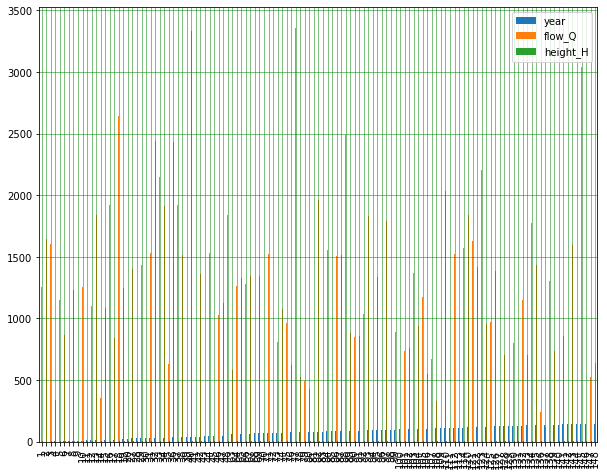

In [13]:
hd.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 1.5808380950075773
Root Mean Square Error 
 0.38125618267794537
R^2 Value: 
 0.88762595490222


In [15]:
df = pd.read_excel('/content/drive/MyDrive/ST4/data.xls')

In [16]:
df.columns = ['year', 'flow_Q', 'height_H']
df.head(10)

,year,flow_Q,height_H
0,1849,3853.892756,NaN
1,1850,1256.402143,4.0
2,1851,1648.542191,4.5
3,1852,1604.857094,4.3
4,1853,341.157419,1.7
5,1854,1148.712945,3.4
6,1855,868.271497,3.4
7,1856,1147.880794,4.1
8,1857,1227.466678,4.1
9,1858,1990.668281,5.3


In [55]:
df['height_H'].interpolate(method='linear', inplace=True, limit_direction="both")
H_historical = df['height_H'].to_list()
# print(H_historical.to_list())

(2.3988465845547373, 0.9999987977085156, 1.2104125122837772)


Text(0, 0.5, 'Frequency')

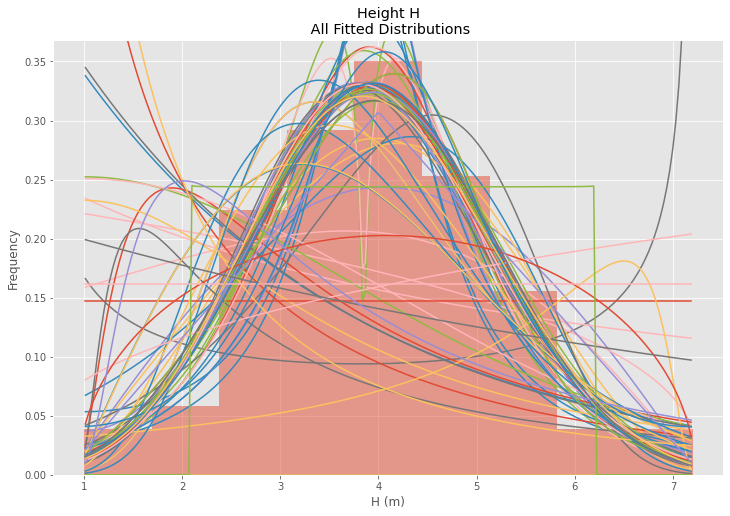

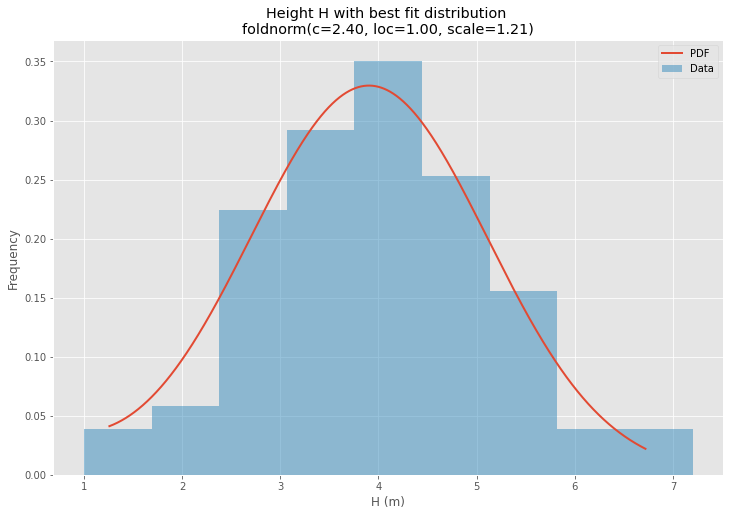

In [18]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """
    print(params)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data 
data = df['height_H']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=9, alpha=0.5, density=True)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Height H\n All Fitted Distributions')
ax.set_xlabel(u'H (m)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

weights = np.ones_like(data)/float(len(data))

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=9, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Height H with best fit distribution \n' + dist_str)
ax.set_xlabel(u'H (m)')
ax.set_ylabel('Frequency')

In [19]:
# Best parameters
scale = best_fit_params[2]
loc = best_fit_params[1]
c = best_fit_params[0]

# quantile = 0.95
q = 0.95
st.foldnorm.ppf(q=q, c=c, loc=loc, scale=scale)

5.8945441303295985

In [20]:
risk = [0.01, 0.025, 0.05, .1]
for q in risk:
    x = st.foldnorm.ppf(q=1-q, c=c, loc=loc, scale=scale)
    print('risk: ' + str(q) + ' -> Height (m): ' + str(round(x, 4)))

risk: 0.01 -> Height (m): 6.7194
risk: 0.025 -> Height (m): 6.276
risk: 0.05 -> Height (m): 5.8945
risk: 0.1 -> Height (m): 5.4548


## **2) Hydraulic model**

Minimize the risk of overflow: the probability that S is positive

In [21]:
# print(fm)
# fm.B
# fm.model
# fm.distribution
# print(fm.B, fm.Q, fm.Ks, fm.L, fm.model, fm.Zm, fm.Zv)

In [22]:
# Create the marginal distributions of the parameters
dist_Q = ot.TruncatedDistribution(ot.Gumbel(558., 1013.), 0, ot.TruncatedDistribution.LOWER)
dist_Ks = ot.TruncatedDistribution(ot.Normal(30.0, 7.5), 0, ot.TruncatedDistribution.LOWER)
dist_Zv = ot.Triangular(49, 50 , 51)
dist_Zm = ot.Triangular(54, 55 , 56)
marginals = [dist_Q, dist_Ks, dist_Zv, dist_Zm]

In [23]:
Zb = 55.5
L = 5.0e3
B = 300.0


In [24]:
def sample_H(N):

  Q = dist_Q.getSample(N)
  Ks = dist_Ks.getSample(N)
  Zv = dist_Zv.getSample(N)
  Zm = dist_Zm.getSample(N)

  Q_rnd =[]
  Ks_rnd =[]
  Zv_rnd =[]
  Zm_rnd =[]
  ZvH_rnd =[]

  for k in range(N):
    Q_rnd.append(Q[k][0])
    Ks_rnd.append(Ks[k][0])
    Zv_rnd.append(Zv[k][0])
    Zm_rnd.append(Zm[k][0])

  H_rnd =[]
  for k in range(N):
    H = (Q_rnd[k]/(Ks_rnd[k] * B * sqrt((Zm_rnd[k]-Zv_rnd[k])/L)))** (3.0/5.0)
    ZvH_rnd.append(H + Zv_rnd[k] - Zb) 
    H_rnd.append(H)

  return H_rnd, Q_rnd, Ks_rnd, Zv_rnd, Zm_rnd, ZvH_rnd

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



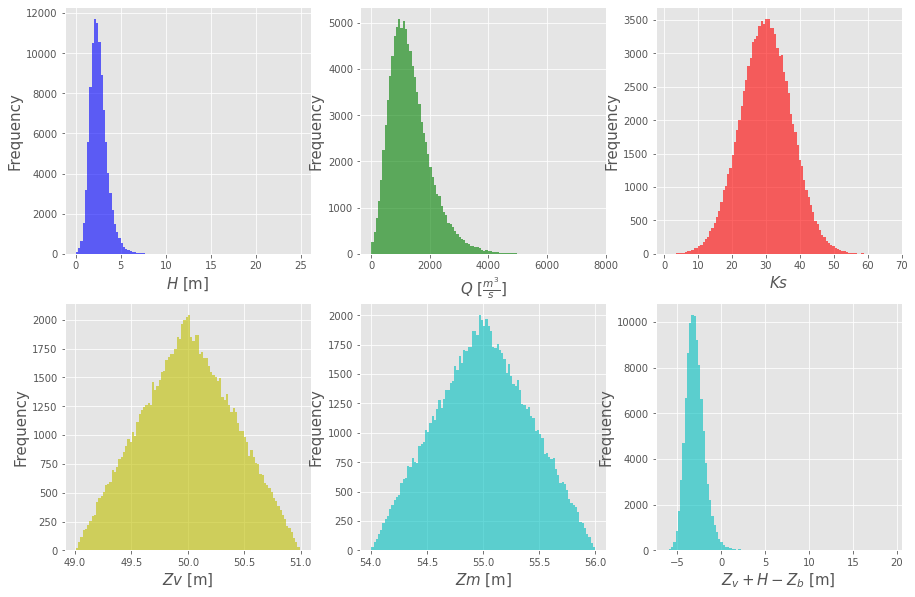

In [25]:
msize = 10**5
binsize = 100
Histograms = sample_H(msize)
print(Histograms)

fig, ax = plt.subplots(2,3, figsize=(15,10))
ax[0][0].hist(Histograms[0], bins = binsize, facecolor='b', alpha=0.6)
ax[0][0].set_xlabel('$H$ [m]',fontsize=15)
ax[0][0].set_ylabel('Frequency',fontsize=15)

ax[0][1].hist(Histograms[1], bins = binsize, facecolor='g', alpha=0.6)
ax[0][1].set_xlabel(r'$Q$ [$\frac{m^3}{s}$]',fontsize=15)
ax[0][1].set_ylabel('Frequency',fontsize=15)

ax[0][2].hist(Histograms[2], bins = binsize, facecolor='r', alpha=0.6)
ax[0][2].set_xlabel(r'$Ks$',fontsize=15)
ax[0][2].set_ylabel('Frequency',fontsize=15)

ax[1][0].hist(Histograms[3], bins = binsize, facecolor='y', alpha=0.6)
ax[1][0].set_xlabel(r'$Zv$ [m]',fontsize=15)
ax[1][0].set_ylabel('Frequency',fontsize=15)

ax[1][1].hist(Histograms[4], bins = binsize, facecolor='c', alpha=0.6)
ax[1][1].set_xlabel(r'$Zm$ [m]',fontsize=15)
ax[1][1].set_ylabel('Frequency',fontsize=15)

ax[1][2].hist(Histograms[5], bins = binsize, facecolor='c', alpha=0.6)
ax[1][2].set_xlabel(r'$Z_v + H - Z_b$ [m]',fontsize=15)
ax[1][2].set_ylabel('Frequency',fontsize=15)

plt.show()

In [26]:
S2_df = pd.DataFrame(Histograms[5], columns=['S'])
print('% of positive values: ' + str(S2_df[S2_df['S'] > 0].shape[0] / msize *100)+"%")

% of positive values: 1.166%


In [27]:
df5 = S2_df[S2_df['S'] > 0]
df5.sort_values(by='S', ascending=False)


,S
43051,19.295434
18394,17.519109
86171,11.878569
61645,11.409121
98263,10.841865
...,...
16532,0.004128
75729,0.003586
10803,0.001862
52263,0.001348


In [28]:
q = [0.95, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 0.996, 0.997, 0.998]
for i in q:
    print('Quantile {}%: {:0.4f}'.format(i*100, df5.quantile(i).S))

Quantile 95.0%: 2.7258
Quantile 96.0%: 3.0134
Quantile 96.5%: 3.2722
Quantile 97.0%: 3.4711
Quantile 97.5%: 4.2183
Quantile 98.0%: 4.7393
Quantile 98.5%: 5.5811
Quantile 99.0%: 6.9430
Quantile 99.5%: 9.0196
Quantile 99.6%: 10.2800
Quantile 99.7%: 11.1283
Quantile 99.8%: 11.7237


In [29]:
def function_flood(X):
    Q, Ks, Zv, Zm = X
    alpha = (Zm - Zv)/L
    H = (Q/(Ks * B * np.sqrt(alpha)))** (3.0/5.0) 
    S = H + Zv - Zb
    return [S]

input_dimension = 4
g = ot.PythonFunction(input_dimension , 1, function_flood)

In [30]:
X = ot.ComposedDistribution([dist_Q, dist_Ks, dist_Zv, dist_Zm])
inputRV = ot.RandomVector(X)

In [31]:
# Run simulations
N = 100000
S = []
for i in range(N):
    S.append(function_flood(inputRV.getRealization()))

In [32]:
S_df = pd.DataFrame(S, columns=['S'])
print('% of positive values: ' + str(S_df[S_df['S'] > 0].shape[0] / N *100)+"%")

% of positive values: 1.196%


In [33]:
df2 = S_df[S_df['S'] > 0]

In [34]:
df2.sort_values(by='S', ascending=False).head(20)

,S
36219,65.070901
26185,27.960596
84230,18.228379
15553,18.161520
23174,12.915517
33166,11.861510
84760,11.550497
23334,10.788350
67157,9.034773
61303,7.530482


In [35]:
q = [0.95, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 0.996, 0.997, 0.998]
for i in q:
    print('Quantile {}%: {:0.4f}'.format(i*100, df2.quantile(i).S))

Quantile 95.0%: 2.7816
Quantile 96.0%: 3.2120
Quantile 96.5%: 3.4481
Quantile 97.0%: 3.8266
Quantile 97.5%: 4.1228
Quantile 98.0%: 5.2392
Quantile 98.5%: 6.0985
Quantile 99.0%: 7.1650
Quantile 99.5%: 11.5583
Quantile 99.6%: 12.0934
Quantile 99.7%: 15.0926
Quantile 99.8%: 18.2023


## **3) Economical model**


Minimize the Economic risk associated with the overflow: minimize for example the cost $C_{c, mean}$

$C_{t}(T) = C_{i}(h_{d}) + T \cdot  C_{m}(h_{d}) $ over duration $T$ 

$C_{d} = C_{s} + C_{g} = C_{s}(S) + C_{g}(S, h_{d}) $ for one year

$C_{c}(T) = C_{t}(T) + \sum_{j=1}^T C_{d,j}(S_{j}, h_{d}) $  over duration $T$ (j is the index of the year)

$C_{c, mean} = \frac{C_{c}(T)}{T} $ 

**Values used for overflow costs**

Overflow in relation to the dike S (m)  | Cost of damage $C_{s}$ to the site (M€) | Cost of damage $C_{s}$ to the dike (percentage of investment cost $C_{i}$)
-|-|-
-0.1      | 0 | 0%       
0      | 0 | 10%  
0.5      | 150 | 50%  
1      | 1500 | 100%  
1.5      | 2000 | 100%  
>2      | 2000 | 100%  


**Values used for costs related to the construction and maintenance of the dike **

Height of the dike $h_{d}$ (m)  | Linear cost (€/m) | Length of the dike $l_{d}$ (m)  | Investment cost C_{i} (k€)
-|-|-|-
0 | - | - | -   
0.1 | 100 | 1000 | 100
0.5 | 150 | 1500 | 225
1 | 424 | 2437 | 1034
2 | 1200 | 3959 | 4750
3 | 2205 | 5000 | 11023
4 | 3394 | 5000 | 16971
5 | 4338 | 5000 | 21692
6 | 5302 | 5000 | 26509
7 | 6282 | 5000 | 31408
8 | 7275 | 5000 | 36377
9 | 8282 | 5000 | 41409
10 | 9300 | 5000 | 46498




In [36]:
data_table1 = {'S': [-.1,0,.5,1,1.5,2], 'C_s': [0, 0,150,1500,2000,2000], 'C_g coefficient': [0, .1,.5,1,1,1]}
data_table2 = {'$h_d$': [0,.1,.5,1,2,3,4,5,6,7,8,9,10], 'Linear cost': [0,100,150,424,1200,2205,3394,4338,5302,6282,7275,8282,9300], '%l_d$': [0,1000,1500,2437,3959,5000,5000,5000,5000,5000,5000,5000,5000], '%C_i$': [0,100,225,1034,4750,11023,16971,21692,26509,31408,36377,41409,46498]}

df_tb1 = pd.DataFrame(data=data_table1)

df_tb2 = pd.DataFrame(data=data_table2)

df_tb1.head(3)




,S,C_s,C_g coefficient
0,-0.1,0,0.0
1,0.0,0,0.1
2,0.5,150,0.5


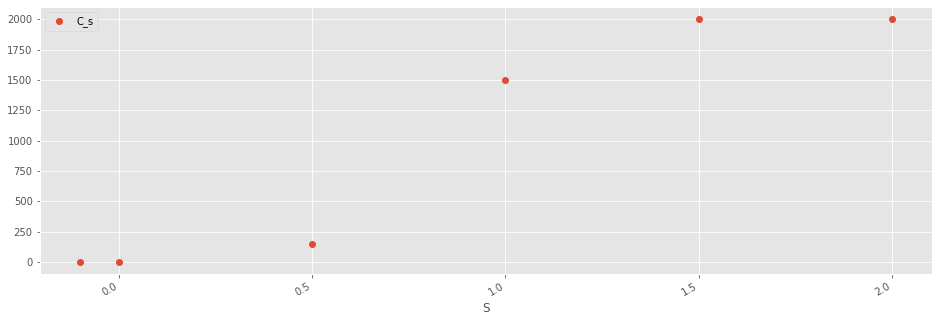

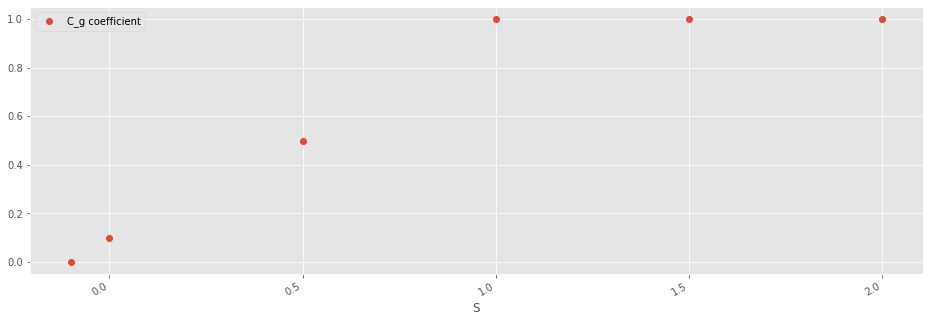

In [37]:
df_tb1.plot(x='S', y='C_s', style='o',subplots=True, layout=(2,1))
plt.title('Cs vs S')
plt.xlabel('S [m]')
plt.ylabel('Cs')

df_tb1.plot(x='S', y='C_g coefficient', style='o',subplots=True, layout=(2,1))
plt.title('Cg coefficient vs S')
plt.xlabel('S [m]')
plt.ylabel('Cg')
plt.show()

In [38]:
X_1 = np.array([0,.5,1]).reshape((-1, 1))
Y_1 = np.array([.1,.5,1])
model_cg = LinearRegression()
model_cg.fit(X_1,Y_1)

X_2 = [0,.5,1,1.5,2]
Y_2_old = [0,150,1500,2000,2000]
Y_2 = [x / max(Y_2_old) for x in Y_2_old]

[array([0.08333333]), array([0.17517007]), array([0.2670068]), array([0.35884354]), array([0.45068027]), array([0.54251701]), array([0.63435374]), array([0.72619048]), array([0.81802721]), array([0.90986395]), 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1000.982580963504, 5888.292527883497, 15976.059913294184, 36632.44583532702, 78247.07630026243, 159402.01691488698, 308082.79920955264, 551704.8898005947, 886173.2790581259, 1248981.0471434183, 1554490.948860645, 1761515.65142422, 1881992.6206227634, 1945980.4694136132, 1978322.0355720941, 1994259.134931096, 2002014.3622603111, 2005765.066626084, 2007573.6530114238, 2008444.5008100213, 2008863.5306637262, 2009065.0901080745, 2009162.0276085832, 2009208.64490096, 2009231.0623500817, 2009241.842321453, 2009247.0260864364, 2009249.5187933128, 2009250.7174539946, 2009251.2938499101, 2009251.5710193415, 2009251.7043007798, 2009251.7683913247, 2009251.7992103032, 200

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


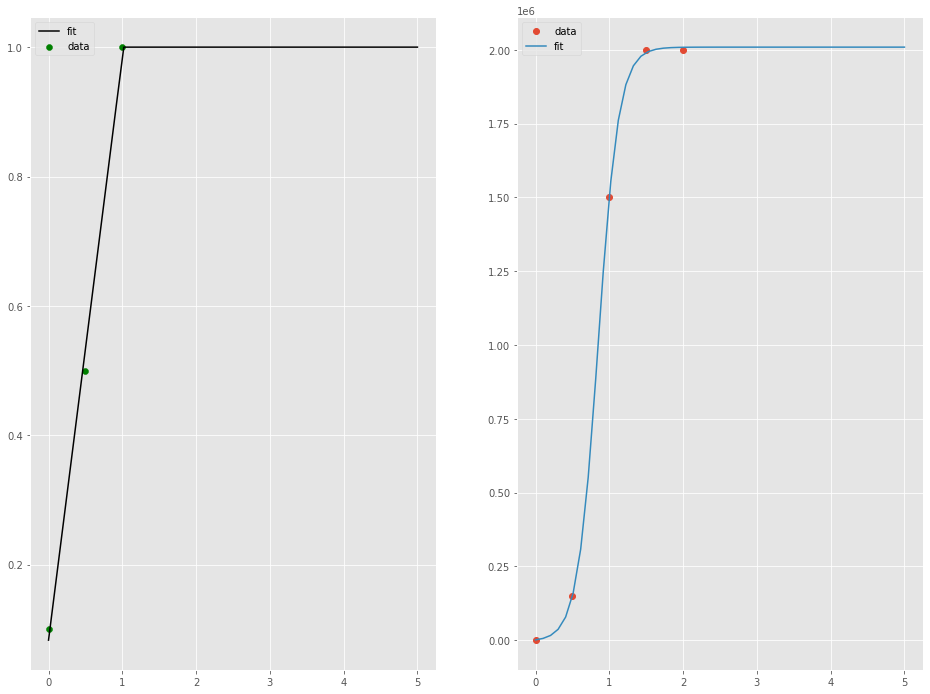

In [39]:
def coef_cg(S,model):
  if S < 0:
    c_g = 0
  elif S < 1:
    S = S.reshape((-1, 1))
    c_g = model.predict(S)
  else:
    c_g = 1
  return c_g

def cs(S):
  from scipy.optimize import curve_fit
  def sigmoid(x, L ,x0, k, b):
      y = L / (1 + np.exp(-k*(x-x0)))+b
      return (y)
  p0 = [max(Y_2), np.median(X_2),1,min(Y_2)] # this is an mandatory initial guess
  popt, pcov = curve_fit(sigmoid, X_2, Y_2,p0, method='dogbox')
  if S<0:
    return 0
  else:
    y = sigmoid(S, *popt)*max(Y_2_old)
    return y*(10**3)

X = np.linspace(0, 5, num=50)
Y_cg = []
Y_cs = []

for i in X:
  Y_cg.append(coef_cg(i,model_cg))
  Y_cs.append(cs(i))
print(Y_cg)
print(Y_cs)

plt.subplot(1, 2, 1)
plt.scatter(X_1, Y_1,color='g',label='data')
plt.plot(X, Y_cg,color='k',label='fit')
plt.legend(loc='best')

Y_2_plot = [x*(10**3) for x in Y_2_old]
plt.subplot(1, 2, 2)
plt.plot(X_2, Y_2_plot, 'o', label='data')
plt.plot(X,Y_cs, label='fit')
plt.legend(loc='best')

plt.show()




In [40]:
def lin_obj(x,a,b):
    return a * x + b

def quad_obj(x,a,b,c):
  return b * (x**2) + a * x + c


hd_list_A=[0,0.1,0.5,1,2]
C_i_list_A=[0,100,225,1034,4750]
popt, _ = curve_fit(quad_obj, hd_list_A, C_i_list_A)
a, b, c= popt

hd_list_B=[2,3,4]
C_i_list_B=[4750,11023,16971]
popt, _ = curve_fit(lin_obj, hd_list_B, C_i_list_B)
d, e= popt

hd_list_C=[5,6,7,8,9,10]
C_i_list_C=[21692,26509,31408,36377,41409,46498]
popt, _ = curve_fit(lin_obj, hd_list_C, C_i_list_C)
f, g= popt

def c_i(hd):
  if hd<0:
    C_i=0
  elif hd<2:
    C_i=quad_obj(hd,a,b,c)

  elif hd<4:
    C_i=lin_obj(hd,d,e)

  else:
    C_i=lin_obj(hd,f,g)

  return C_i
  

In [41]:
def cost(hd,K,T):
  S = K - hd
  def cd(S,hd):
    C_g = c_i(hd)*coef_cg(S,model_cg)
    C_s = cs(S)
    C_dj = C_g + C_s
    return C_dj

  C_d_total = 0
  for j in range(T):
    C_d_total += cd(S[j],hd)
  C_t = (1+T*0.01)*c_i(hd)
  C_c = C_t + C_d_total
  C_c_mean = C_c/T
  # print(C_d_total, C_t)

  

  return C_c_mean




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

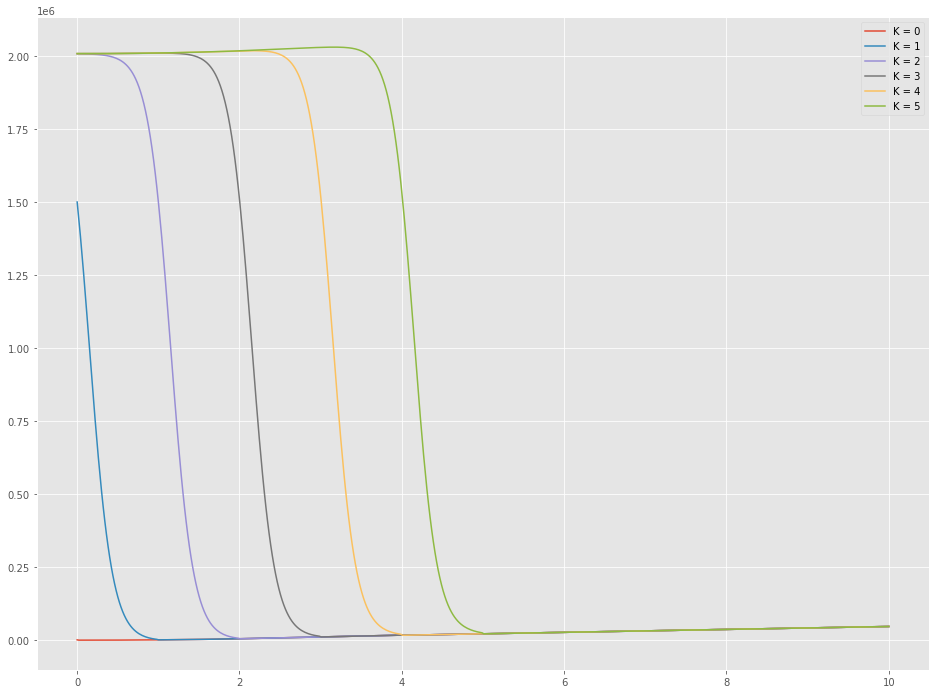

In [42]:
h_d_test = np.linspace(0,10,500)
# Histograms = sample_H(1)
# K = Histograms[5]
for i in range(6):
  K = [i]  
  Y = [cost(i,K,1) for i in h_d_test]
  plt.plot(h_d_test, Y, label = 'K = %i' %(i))
plt.legend()
plt.show()

In [43]:
T = 30

In [44]:
ZvHZb_econo = sample_H(T)[5]

print(ZvHZb_econo)

[-3.116230410317094, -3.706305261124072, -2.93016298482398, -2.5952152629682743, -1.5222172945785104, -1.5529929117842656, -0.847754483142559, -3.482351399011229, -4.204666174768434, -2.183441416142088, -4.0301918814362665, -3.8231503778088154, -4.087056367393579, -2.764994050370426, -3.5013134727942656, -2.8017727584121914, -4.262315120468003, -0.5707487302117471, -4.215261793433662, -2.5102281263861954, -2.3398371884375706, -3.00911157616099, -4.142320814065641, -4.550479126617468, -2.133302418893919, -3.502247337259597, -4.416706921644014, -1.7811551923021014, 0.24215252415152122, -2.8611395064140694]


In [45]:
from scipy.optimize import minimize, LinearConstraint, Bounds

In [62]:
N = 10
def sample_cost_T(N):
  l_cost=[]
  l_x=[]
  for i in range(N):
    K = sample_H(T)[5]
    x0 = np.array([2])
    res = minimize(cost, x0, args=(K,T), method='nelder-mead',options={'xatol':1e-8,'disp': True})
    l_cost.append(res.fun)
    l_x.append(res.x[0])
  return l_cost, l_x

hist_econo_T = sample_cost_T(N)
# hist_econo = sample_cost(N)


ValueError: ignored

In [47]:
K = sample_H(T)[5]
b =[-x for x in K]
print(b)
print(K)

[4.170952835049853, 4.1149255331699734, 2.818393688978553, 4.632186769884306, 3.436059181616301, 3.570292615915683, 2.930887822839807, 3.1803537069046826, 2.8825346002746883, 3.943989673325156, 1.748063541502944, 3.7084469219815404, 2.835949598803488, 2.9231279782497808, 3.0624512543334177, -0.1734445678386578, 1.7017193439409013, 1.4264116078489764, 2.901681564019569, 2.4354175292230877, 4.580658687931823, 1.6825279819291765, 4.366242512500982, 2.028046827125415, 2.4290336997941964, 4.63603128515998, 2.7094882025042466, 2.8689018394527537, 4.000203173151128, 4.455005537621076]
[-4.170952835049853, -4.1149255331699734, -2.818393688978553, -4.632186769884306, -3.436059181616301, -3.570292615915683, -2.930887822839807, -3.1803537069046826, -2.8825346002746883, -3.943989673325156, -1.748063541502944, -3.7084469219815404, -2.835949598803488, -2.9231279782497808, -3.0624512543334177, 0.1734445678386578, -1.7017193439409013, -1.4264116078489764, -2.901681564019569, -2.4354175292230877, -4.58

In [56]:
x0 = np.array([2])
res_hist = minimize(cost, x0, args=(H_historical,len(H_historical)), method='nelder-mead',options={'xatol':1e-8,'disp': True})
print(res_hist.fun,res_hist.x[0] )

Optimization terminated successfully.
         Current function value: 543.009141
         Iterations: 38
         Function evaluations: 76
543.0091413184454 7.200000000000009


In [58]:
print(res_hist)

 final_simplex: (array([[7.2       ],
       [7.20000001]]), array([543.00914132, 543.00914181]))
           fun: 543.0091413184454
       message: 'Optimization terminated successfully.'
          nfev: 76
           nit: 38
        status: 0
       success: True
             x: array([7.2])


In [60]:
N = 10
def sample_cost(N):
  bounds = Bounds([0], [20])
  A = []
  uno = [1]
  A.extend([uno]*T)
  l_cost=[]
  l_x=[]
  for i in range(N):
    K = sample_H(T)[5]
    # linear_constraint = LinearConstraint(A, [[0]*T], [-x for x in K])
    x0 = np.array([2])
    # res = minimize(cost, x0, args=(K,T), method='trust-constr',constraints=[linear_constraint],bounds=bounds)
    # res = minimize(cost, x0, args=(K,T), method='trust-constr',constraints=[linear_constraint],bounds=bounds)
    res = minimize(cost, x0, args=(K,T), method='nelder-mead',options={'xatol':1e-8,'disp': True})
    l_cost.append(res.fun)
    l_x.append(res.x[0])
  return l_cost, l_x


hist_econo = sample_cost(N)


ValueError: ignored

In [ ]:
binsize = 20

plt.subplot(1, 2, 1)
plt.hist(hist_econo[0], bins = binsize, facecolor='y', alpha=0.6)
plt.xlabel(r'Cost [m]',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

plt.subplot(1, 2, 2)
plt.hist(hist_econo[1], bins = binsize, facecolor='r', alpha=0.6)
plt.xlabel(r'$h_d$ [m]',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

plt.show()

In [ ]:
# Run simulations
S_econo = []
for i in range(T):
    S.append(function_flood(inputRV.getRealization()))